<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/lstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Use plot styling from seaborn.
  sns.set(style="darkgrid")
  # Increase the plot size and font size.
  sns.set(font_scale=1.5)
  plt.rcParams["figure.figsize"] = (12, 6)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 40s 43ms/step - loss: 0.6398 - accuracy: 0.6205 - val_loss: 0.4026 - val_accuracy: 0.8240
Epoch 2/100
176/176 [==============================] - 7s 38ms/step - loss: 0.3390 - accuracy: 0.8619 - val_loss: 0.3189 - val_accuracy: 0.8660
Epoch 3/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2445 - accuracy: 0.9020 - val_loss: 0.2914 - val_accuracy: 0.8748
Epoch 4/100
176/176 [==============================] - 7s 39ms/step - loss: 0.2094 - accuracy: 0.9213 - val_loss: 0.3175 - val_accuracy: 0.8764
Epoch 5/100
176/176 [==============================] - 7s 39ms/step - loss: 0.2054 - accuracy: 0.9225 - val_loss: 0.3201 - val_accuracy: 0.8768
Epoch 6/100
176/176 [==============================] - 7s 39ms/step - loss: 0.1736 - accuracy: 0.9347 - val_loss: 0.3359 - val_accuracy: 0.8700
Epoch 7/100
176/176 [==============================] - 7s 39ms/step - loss: 0.1652 - accuracy: 0.9375 - val_loss: 0.38

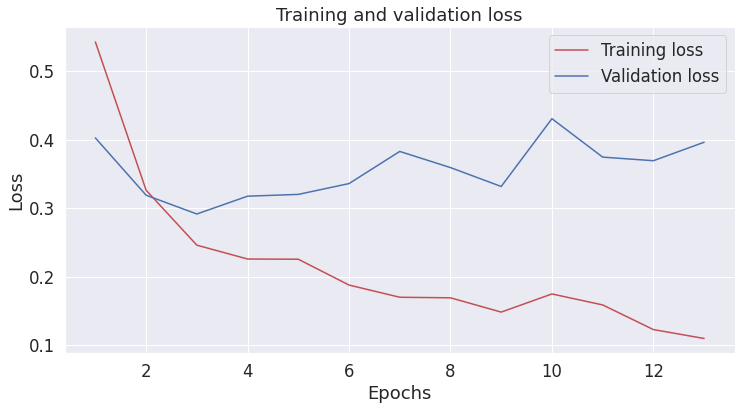

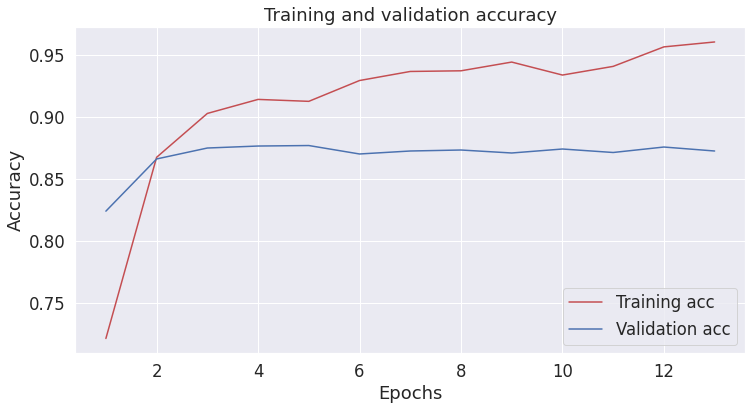

              precision    recall  f1-score   support

           0      0.865     0.897     0.881     12500
           1      0.893     0.860     0.876     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 9s 43ms/step - loss: 0.6752 - accuracy: 0.5886 - val_loss: 0.6011 - val_accuracy: 0.7332
Epoch 2/100
176/176 [==============================] - 7s 40ms/step - loss: 0.4752 - accuracy: 0.7934 - val_loss: 0.3314 - val_accuracy: 0.8620
Epoch 3/100
176/176 [==============================] - 7s 39ms/step - loss: 0.3078 - accuracy: 0.8715 - val_loss: 0.2878 - val_accuracy: 0.8868
Epoch 4/100
176/176 [==============================] - 7s 40ms/step - loss: 0.2400 - accuracy: 0.9078 - val_loss: 0.2881 - val_accuracy: 0.8840
Epoch 5/100
176/176 [==============================] - 7s 40ms/step - loss: 0.2

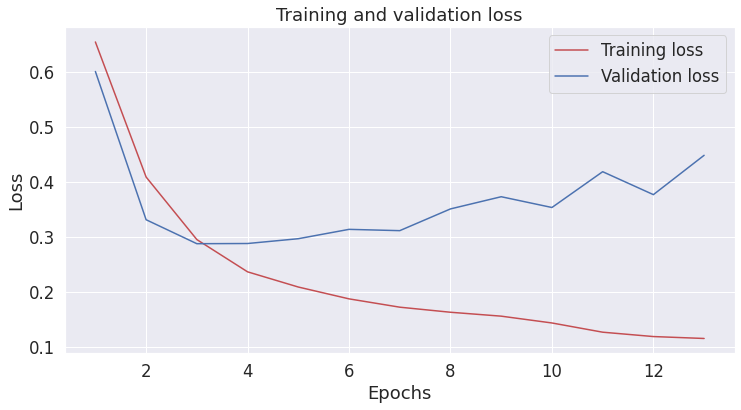

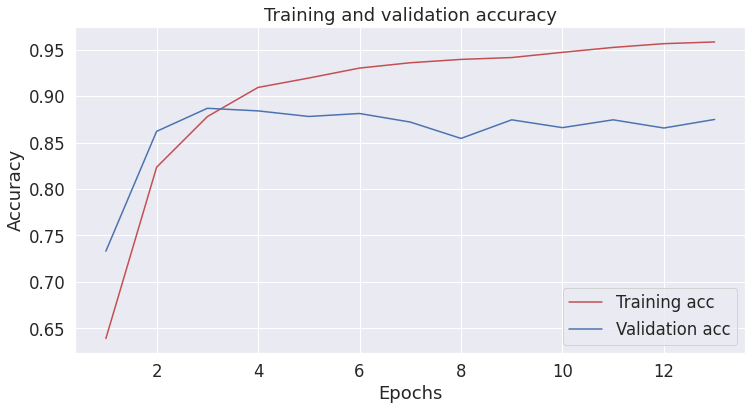

              precision    recall  f1-score   support

           0      0.873     0.879     0.876     12500
           1      0.878     0.872     0.875     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 9s 42ms/step - loss: 0.6489 - accuracy: 0.6122 - val_loss: 0.3429 - val_accuracy: 0.8604
Epoch 2/100
176/176 [==============================] - 7s 40ms/step - loss: 0.3158 - accuracy: 0.8732 - val_loss: 0.4019 - val_accuracy: 0.8272
Epoch 3/100
176/176 [==============================] - 7s 40ms/step - loss: 0.2539 - accuracy: 0.9029 - val_loss: 0.3346 - val_accuracy: 0.8604
Epoch 4/100
176/176 [==============================] - 7s 41ms/step - loss: 0.2357 - accuracy: 0.9109 - val_loss: 0.2979 - val_accuracy: 0.8832
Epoch 5/100
176/176 [==============================] - 7s 40ms/step - loss: 0.2

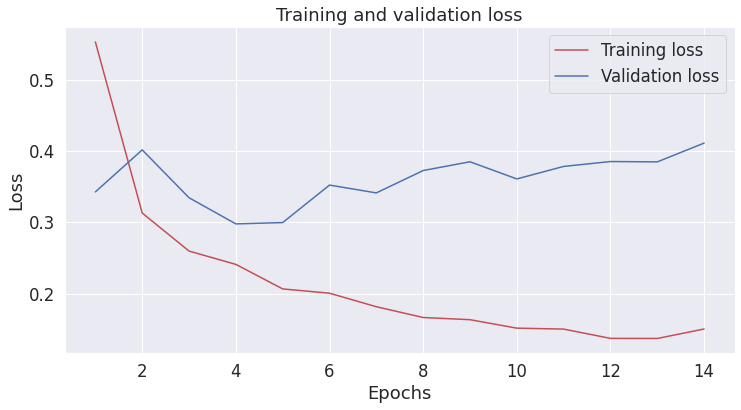

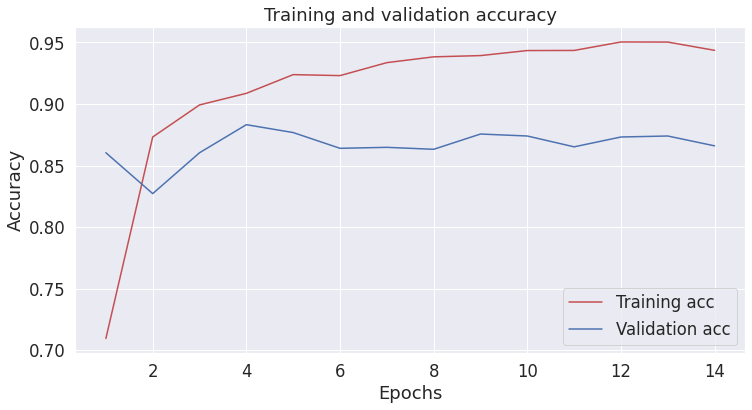

              precision    recall  f1-score   support

           0      0.899     0.844     0.871     12500
           1      0.853     0.906     0.878     12500

    accuracy                          0.875     25000
   macro avg      0.876     0.875     0.875     25000
weighted avg      0.876     0.875     0.875     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 10s 47ms/step - loss: 0.6209 - accuracy: 0.6209 - val_loss: 0.3273 - val_accuracy: 0.8656
Epoch 2/100
176/176 [==============================] - 7s 41ms/step - loss: 0.2869 - accuracy: 0.8872 - val_loss: 0.3475 - val_accuracy: 0.8516
Epoch 3/100
176/176 [==============================] - 7s 41ms/step - loss: 0.2501 - accuracy: 0.9042 - val_loss: 0.3077 - val_accuracy: 0.8744
Epoch 4/100
176/176 [==============================] - 7s 39ms/step - loss: 0.2123 - accuracy: 0.9187 - val_loss: 0.3217 - val_accuracy: 0.8744
Epoch 5/100
176/176 [==============================] - 7s 40ms/step - loss: 0.

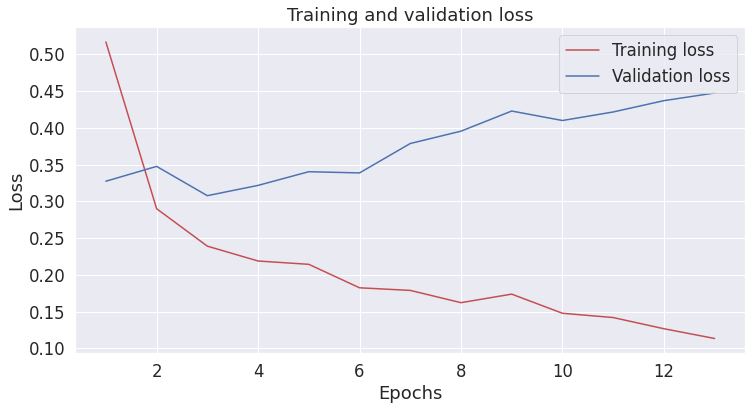

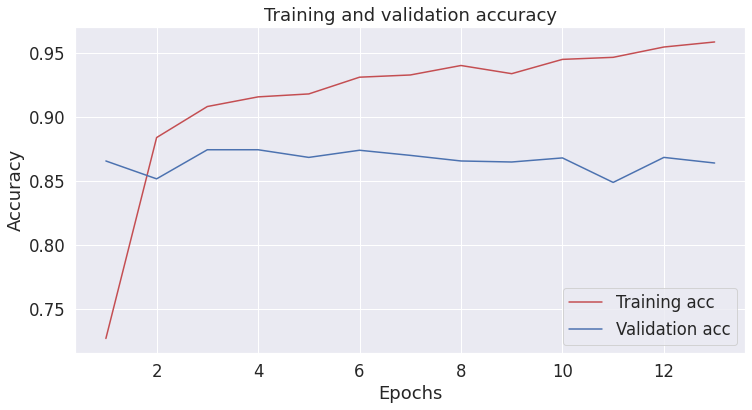

              precision    recall  f1-score   support

           0      0.906     0.836     0.869     12500
           1      0.848     0.913     0.879     12500

    accuracy                          0.875     25000
   macro avg      0.877     0.875     0.874     25000
weighted avg      0.877     0.875     0.874     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 9s 42ms/step - loss: 0.6639 - accuracy: 0.6000 - val_loss: 0.4213 - val_accuracy: 0.8028
Epoch 2/100
176/176 [==============================] - 7s 41ms/step - loss: 0.3600 - accuracy: 0.8499 - val_loss: 0.3368 - val_accuracy: 0.8544
Epoch 3/100
176/176 [==============================] - 7s 40ms/step - loss: 0.2683 - accuracy: 0.8929 - val_loss: 0.2887 - val_accuracy: 0.8760
Epoch 4/100
176/176 [==============================] - 7s 40ms/step - loss: 0.2426 - accuracy: 0.9083 - val_loss: 0.2958 - val_accuracy: 0.8716
Epoch 5/100
176/176 [==============================] - 7s 41ms/step - loss: 0.2

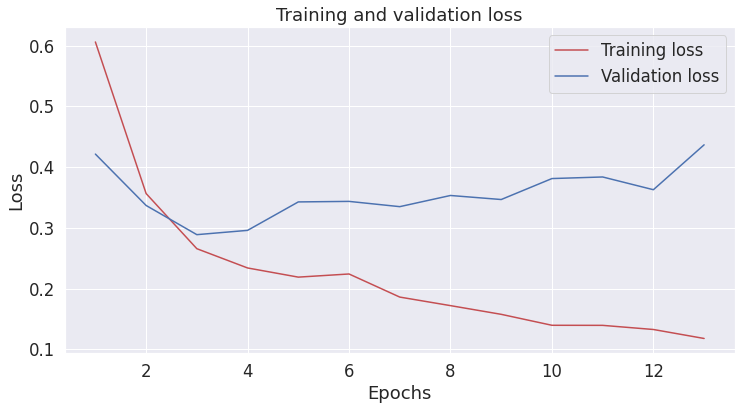

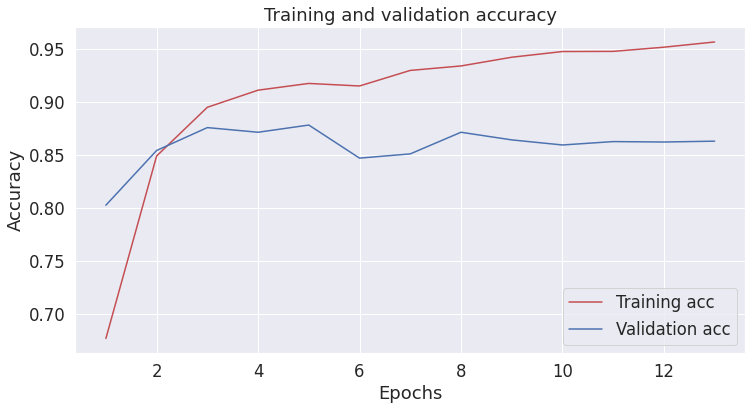

              precision    recall  f1-score   support

           0      0.880     0.878     0.879     12500
           1      0.878     0.880     0.879     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 10s 47ms/step - loss: 0.6593 - accuracy: 0.5969 - val_loss: 0.3693 - val_accuracy: 0.8464
Epoch 2/100
176/176 [==============================] - 7s 41ms/step - loss: 0.3252 - accuracy: 0.8665 - val_loss: 0.3197 - val_accuracy: 0.8716
Epoch 3/100
176/176 [==============================] - 7s 42ms/step - loss: 0.2443 - accuracy: 0.9030 - val_loss: 0.3041 - val_accuracy: 0.8748
Epoch 4/100
176/176 [==============================] - 7s 42ms/step - loss: 0.2368 - accuracy: 0.9052 - val_loss: 0.4980 - val_accuracy: 0.7428
Epoch 5/100
176/176 [==============================] - 7s 42ms/step - loss: 0.

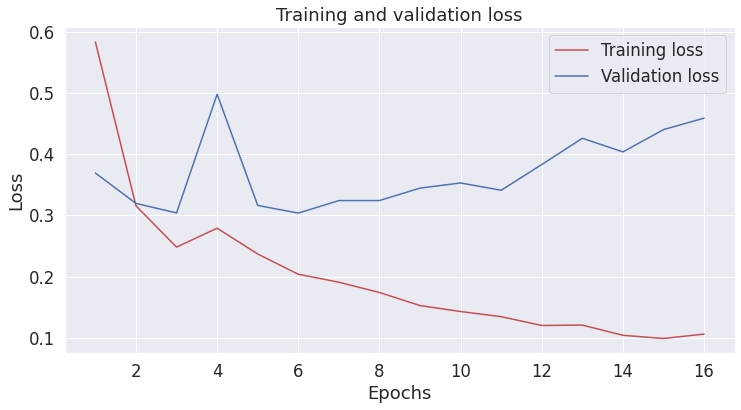

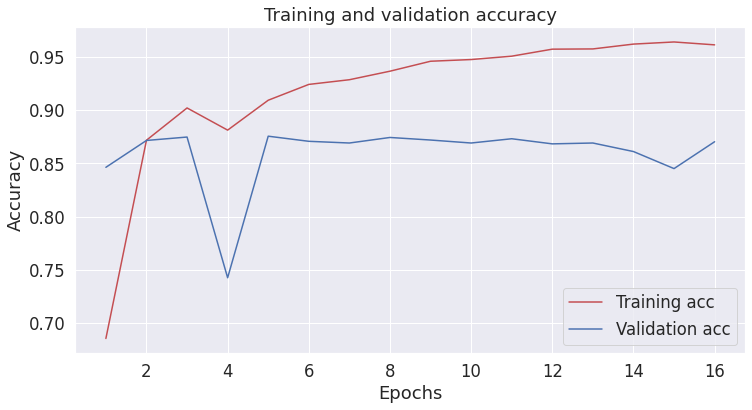

              precision    recall  f1-score   support

           0      0.858     0.884     0.870     12500
           1      0.880     0.853     0.866     12500

    accuracy                          0.868     25000
   macro avg      0.869     0.868     0.868     25000
weighted avg      0.869     0.868     0.868     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 9s 44ms/step - loss: 0.6337 - accuracy: 0.6129 - val_loss: 0.3268 - val_accuracy: 0.8632
Epoch 2/100
176/176 [==============================] - 7s 41ms/step - loss: 0.3210 - accuracy: 0.8684 - val_loss: 0.2947 - val_accuracy: 0.8836
Epoch 3/100
176/176 [==============================] - 8s 43ms/step - loss: 0.2503 - accuracy: 0.9007 - val_loss: 0.3357 - val_accuracy: 0.8560
Epoch 4/100
176/176 [==============================] - 8s 43ms/step - loss: 0.2346 - accuracy: 0.9097 - val_loss: 0.3076 - val_accuracy: 0.8724
Epoch 5/100
176/176 [==============================] - 7s 41ms/step - loss: 0.2

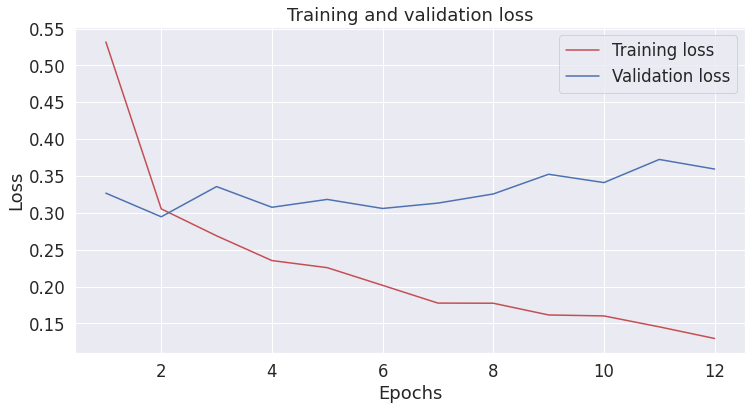

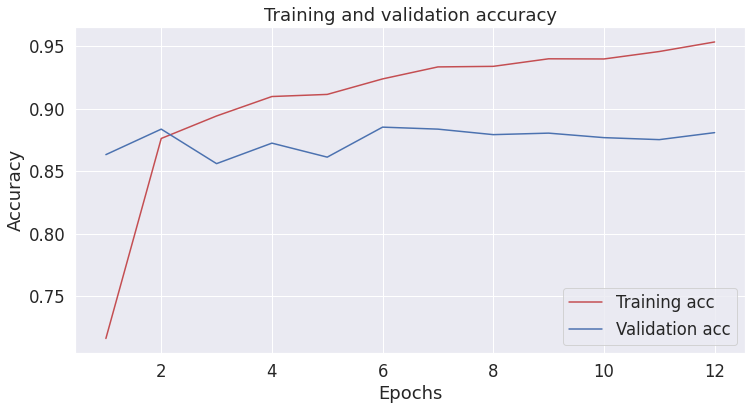

              precision    recall  f1-score   support

           0      0.895     0.847     0.870     12500
           1      0.855     0.901     0.877     12500

    accuracy                          0.874     25000
   macro avg      0.875     0.874     0.874     25000
weighted avg      0.875     0.874     0.874     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 10s 47ms/step - loss: 0.6374 - accuracy: 0.6059 - val_loss: 0.3477 - val_accuracy: 0.8612
Epoch 2/100
176/176 [==============================] - 7s 41ms/step - loss: 0.3680 - accuracy: 0.8530 - val_loss: 0.3435 - val_accuracy: 0.8556
Epoch 3/100
176/176 [==============================] - 7s 42ms/step - loss: 0.2744 - accuracy: 0.8911 - val_loss: 0.2846 - val_accuracy: 0.8820
Epoch 4/100
176/176 [==============================] - 8s 43ms/step - loss: 0.2326 - accuracy: 0.9129 - val_loss: 0.3197 - val_accuracy: 0.8636
Epoch 5/100
176/176 [==============================] - 7s 42ms/step - loss: 0.

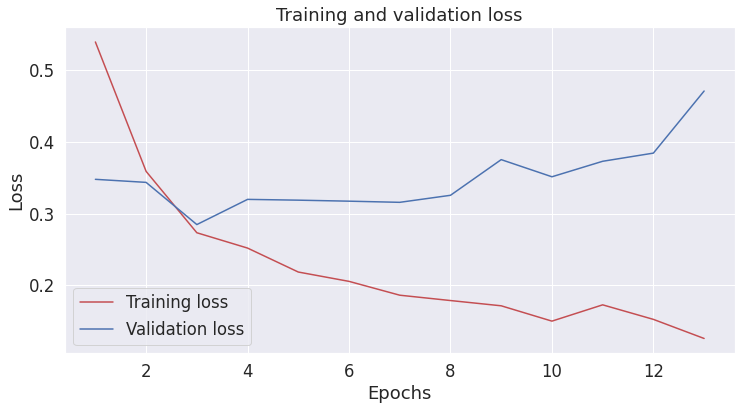

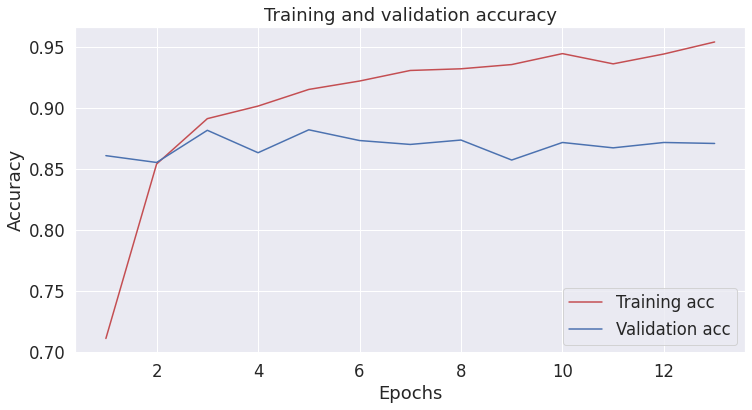

              precision    recall  f1-score   support

           0      0.882     0.880     0.881     12500
           1      0.880     0.882     0.881     12500

    accuracy                          0.881     25000
   macro avg      0.881     0.881     0.881     25000
weighted avg      0.881     0.881     0.881     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 9s 44ms/step - loss: 0.6505 - accuracy: 0.6022 - val_loss: 0.3848 - val_accuracy: 0.8352
Epoch 2/100
176/176 [==============================] - 7s 42ms/step - loss: 0.3300 - accuracy: 0.8628 - val_loss: 0.2912 - val_accuracy: 0.8736
Epoch 3/100
176/176 [==============================] - 7s 42ms/step - loss: 0.2580 - accuracy: 0.9029 - val_loss: 0.2902 - val_accuracy: 0.8760
Epoch 4/100
176/176 [==============================] - 7s 43ms/step - loss: 0.2275 - accuracy: 0.9137 - val_loss: 0.3166 - val_accuracy: 0.8752
Epoch 5/100
176/176 [==============================] - 7s 42ms/step - loss: 0.2

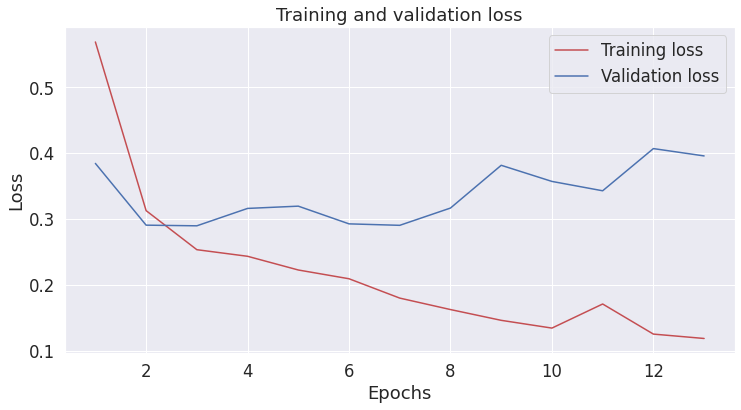

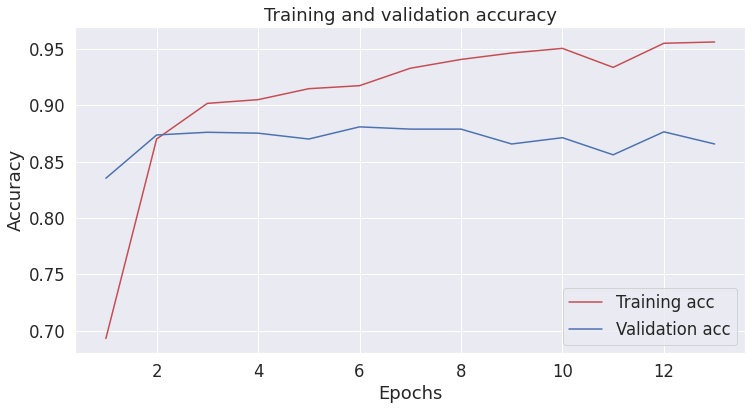

              precision    recall  f1-score   support

           0      0.854     0.908     0.880     12500
           1      0.902     0.845     0.873     12500

    accuracy                          0.877     25000
   macro avg      0.878     0.877     0.877     25000
weighted avg      0.878     0.877     0.877     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 10s 49ms/step - loss: 0.6621 - accuracy: 0.5880 - val_loss: 0.4588 - val_accuracy: 0.7852
Epoch 2/100
176/176 [==============================] - 7s 42ms/step - loss: 0.3762 - accuracy: 0.8407 - val_loss: 0.3190 - val_accuracy: 0.8676
Epoch 3/100
176/176 [==============================] - 7s 41ms/step - loss: 0.2831 - accuracy: 0.8851 - val_loss: 0.3674 - val_accuracy: 0.8464
Epoch 4/100
176/176 [==============================] - 7s 42ms/step - loss: 0.2645 - accuracy: 0.8971 - val_loss: 0.3065 - val_accuracy: 0.8868
Epoch 5/100
176/176 [==============================] - 7s 42ms/step - loss: 0

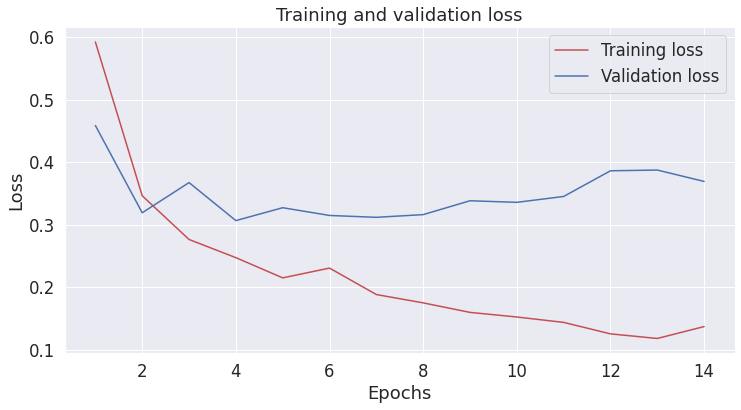

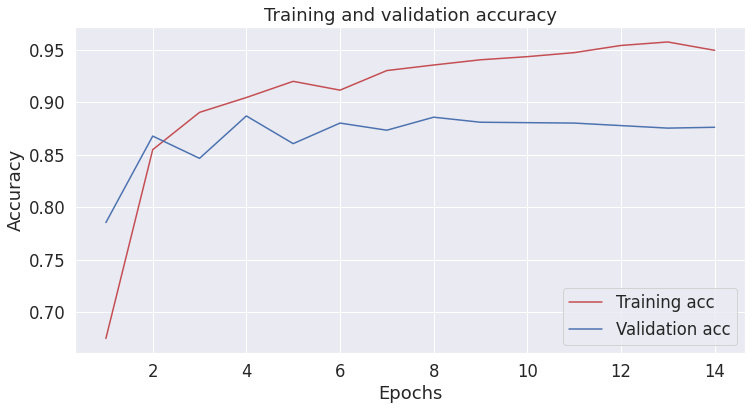

              precision    recall  f1-score   support

           0      0.853     0.897     0.875     12500
           1      0.892     0.845     0.868     12500

    accuracy                          0.871     25000
   macro avg      0.872     0.871     0.871     25000
weighted avg      0.872     0.871     0.871     25000


Average accuracy: 0.8754 (+/- 0.0035)
Average loss: 0.3043 (+/- 0.0125)
Average F1: 0.8753 (+/- 0.0047)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Dropout(rate=dropout_rate),
    LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
